 # Mid-term Project : Design and implementation on ECG filter

# The basic information about ECG :

    The Electrocardiogram (ECG) is an important bio-electrical signal, used by the cardiologist to diagnose various diseases and conditions associated with the heart and the state of the cardiac system. ECG is a test that measures electrical activity of the heart with the help of electrodes placed on the surface of the body. The ECG is a graphic recording or display of time variant voltages produced by the myocardium during the cardiac cycle. For the diagnosis a cardiologist also looks at the heart rate. The normal value of heart rate of an adult person lies in the range of 60 to 100 beats per minute (BPM).[7]

The ECG wave forms in the following manner:

P wave: represents atria depolarisation.

QRS complex: represents ventricular depolarisation.4

T wave: represents ventricular repolarisation.


There are 4 intervals for ECG signals that PR, QT, RR and ST. The heart

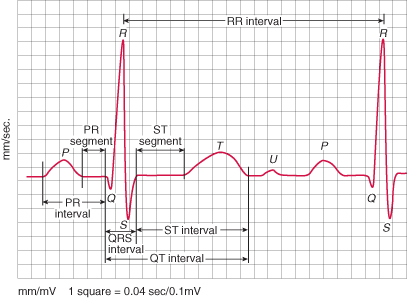 [1]
PR interval :

The first deflection is the P wave associated with right and left atrial depolarization as shown in the figure.

QRS complex :

The second wave is the QRS complex  first deflection in the complex, if it is negative, is called a Q wave. The first positive deflection in the complex is called an R wave. A negative deflection after an R wave is called an S wave. and the last wave is known as the T wave.[1]

QT interval :

The QT interval is measured from the beginning of the QRS to the end of the T wave. It represents the time in which the ventricles depolarize and repolarize and is a measure of ventricular action potential (AP) duration.

ST interval :

Following the QRS complex is the ST segment, extending from where the QRS ends (irrespective of what the last wave in the complex is) to where the T wave begins.

Ans 1 : Here I plot the whole signal in omne line with the 43081 samples :


 The length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


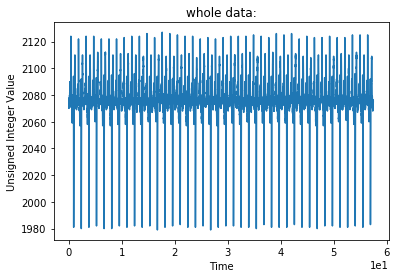

In [1]:

%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
from scipy import signal
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division
f = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 lines')
#we will now populate an array for the time which we now is 1/750 step for a total of 43081 samples
x=np.arange(0,43081/750.,1/750.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
plt.subplot(111)
plt.plot(x,AllSignal[:43081])
plt.title('whole data:')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format( axis='x', scilimits=(0,0))
f.close()

####################################################

Ans 5 : Calculation for 5 beats Plotting :

####################################################

Method 1 :

here we can see the 40 beats for whole dataline and the total samples are 43081 arround 

means 43081/40 = 1077 samples/beat

equals to 5385 samples for 5 beats 

Methad 2 :

assume that we get avarage 85 beats/60 sec

means 1.16 sec time interval between every beats
 
 means that for 5 beats the timeline = 5*1.16 = 7.01 sec [1]  
 
 So here we can see the Samples for the 5 beats only is (750) * 7 sec= 5285 samples ~ 5385 samples from previous calculation.
 

##############################################

 Ans 6  : Plot of the 5 beats :
##############################################


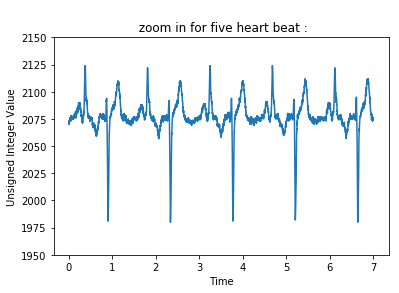

In [2]:
print "##############################################" 
print('\n Ans 6  : Plot of the 5 beats :')
print "##############################################" 
x=np.arange(0,43081/750.,1/750.)
index=np.where(x>7)
index=index[0]
plt.subplot(111)
plt.plot(x[:index[0]],AllSignal[:index[0]])
plt.title('\n zoom in for five heart beat :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ylim([1950,2150])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

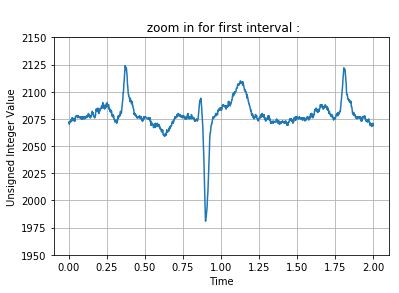

In [9]:
index=np.where(x>2)
index=index[0]
plt.subplot(111)
plt.plot(x[:index[0]],AllSignal[:index[0]])
plt.title('\n zoom in for first interval :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ylim([1950,2150])
plt.grid()
plt.show()



 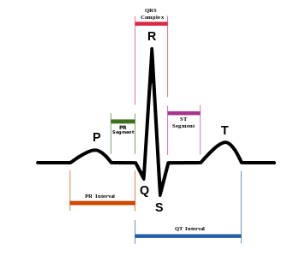
Ans 7:

The heart beats is lower because the PR interval is smaller than the QT interval and it is significuntly large as per the given ECG signal.

Ans 8 :

The basic way to calculate the rate is simple. By considering the duration between two identical points of consecutive ECG waveforms such as the R-R duration. Take this duration and divide it into 60. The resulting equation would be:

Rate = 60/(R-R interval) [2]

A quicker way to obtain an approximate rate is

to go by  RR or PP interval. If it is 1 big box (0.5 secs) then the rate is 60/0.25 = 240 bpm. The rest of the sequence would be as follows.

here we can see that the the time interval between two peaks is 1.5 sec,
here one block is equal to 0.25 sec

5 large blocks: 34

4 large blocks: 40

3 large blocks: 48

2 large blocks: 120

1 large block: 240

means that here we get the RR peaks at evry 4 blocks menas the Heart rate is around 40 to 45 BPM.[2]


##############################################

 Ans 9  : DFT for unfiltered signal :
##############################################


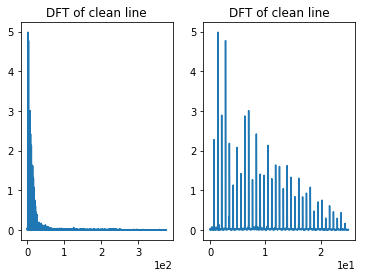

In [4]:
print "##############################################" 
print('\n Ans 9  : DFT for unfiltered signal :')
print "##############################################" 
from __future__ import division

Line=AllSignal[:43080]
#we first eliminate dc
dataF=Line-np.mean(Line)
L=len(dataF)

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:21540])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############################################

 Ans 10 : The  frequency at maximum peak is: 4.98149090804 Hz
##############################################

 The frequency that the RR peak occurs is  :1.375
##############################################

 Ans 11 : The Heartbeats for given signal is : 43.6363636364 BPM
##############################################


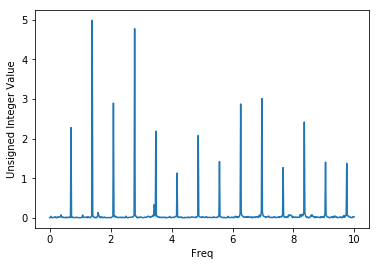

In [5]:
i=np.where(f>10)
i=i[0]
plt.xlabel('Freq')
plt.ylabel('Unsigned Integer Value')
plt.plot(f[0:i[0]], Pyy[0:i[0]]) 
peak=np.amax(Pyy)
print "##############################################" 
print('\n Ans 10 : The  frequency at maximum peak is: ' + str(peak)+' Hz')
#  Here we find that my maximum peak is 4.98 Hz and it ocurs between 0 to 1.4 sec.
# means my step size(43081/750)*1.45 = 80 for loop range   
# I choose (0,8) for my loop

step=0
j=0
x=0
for j in range (0,80):
    if (Pyy[x]) > peak:
        x=j
        
    step=((750)/43081)*j
    # now frequency at maximum peak occurs is
    maxfreq=str(round(step,3))
    # means the heart rate per minutes is :
    
print "##############################################" 
print('\n The frequency that the RR peak occurs is  :'+str(maxfreq))

print "##############################################" 

hrtbeat = 60/1.375

print('\n Ans 11 : The Heartbeats for given signal is : '+ str(hrtbeat) + ' BPM')

print "##############################################"

Ans 12 : 

    system's frequency response H(w) and the Fourier transform of the signal that we put into it X, then it is straightforward to calculate the Fourier transform of the system's output;
    From The DFT , we can see that the maximum amplitude shows the frequency at which the large peak occurs is 4.98 point  and the High peaks are above 3 hz . So we can conclude that other than this signals are harmonics or noise. So we can easily eiminate them by  low pass filter. Now here we can see from the last graph that the first peak occurs at 0.731 Hz and from that the heratbeats per minutes is equal to 60/0.73= 45 BPM approximately.
    
Ans 13 :

    Low-pass filters  on the ECG are used to remove high frequency muscle artifact and external interference. They typically attenuate only the amplitude of higher frequency ECG components. Analog low-pass filtering has a noticeable affect on the QRS complex but do not alter repolarization signals. [5]
 
    Low pass filters used in the ECG equipment may change the amplitude, wavelength, and displacement of (ECG) intervals. When using lowpass filters, small frequency cutoff value makes the low-amplitude potentials of 5-20 mV virtually invisible on the ECG. The higher the order of the filters, the greater is the distortion regardless of the type of filters. The amplitude ripple of filters in the passband and a nonlinear character of phase response contribute to cardiac signal disturbance equal to the informative low-amplitude of the heart biopotential by the order of magnitude [6]
    
    In short, The overall results that the reduction in amplitude power doesn't make a sirious problem. 
    
    I mention the variations in the all intervals in next comparision graph between the filtered and unfiltered signal.

    

##############################################

Ans 14 & 15 : Butterworth filter with 100 Hz cutoff frequency and frequency responce of this filter.

##############################################

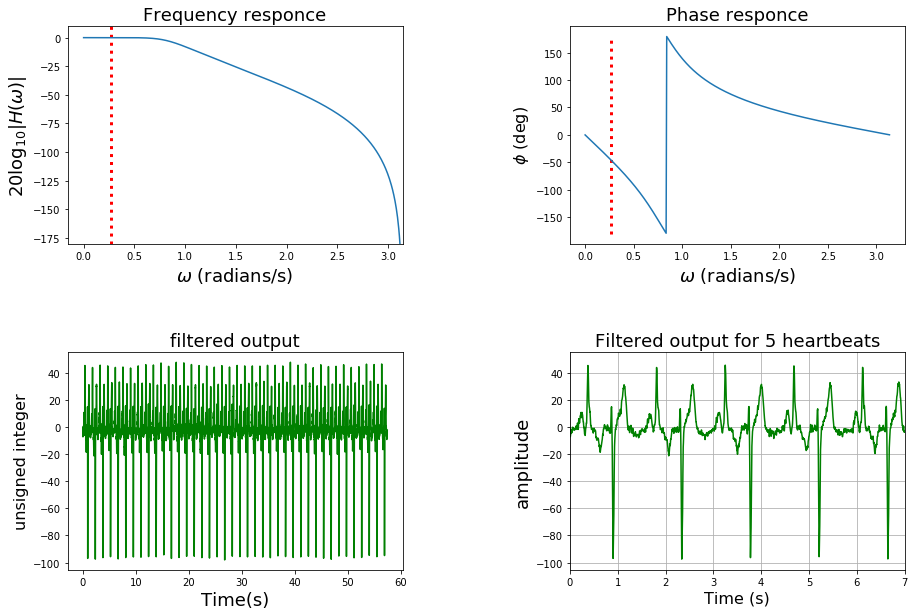

In [6]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750 # sampling freq
NF=fs/2 # nyquiest freq
cutoff= 100 # cutoff freq
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF) # putput siganl with filter

x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce',fontsize=18)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase responce',fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s,'g')
ax.set_title('filtered output',fontsize=18)
ax.set_xlabel('Time(s)',fontsize=18)
ax.set_ylabel('unsigned integer',fontsize=16)


ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Filtered output for 5 heartbeats',fontsize=18)
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Time (s)',fontsize=16)

ax.grid()



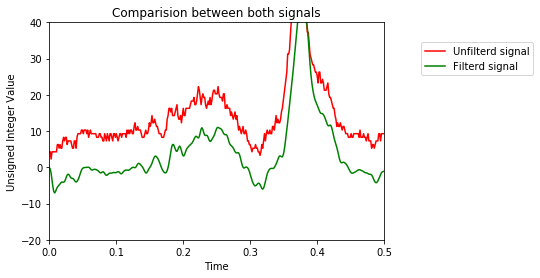

In [7]:

import matplotlib.pyplot as plt
origin=Line-np.mean(Line)+10 
#note: I shift the statrt point near to 0 but not 0 to avoid overlap in between signals in graph.
plt.plot(x,origin,'r' ,label="Unfilterd signal")
plt.plot(x,s,'g', label="Filterd signal")
plt.title('Comparision between both signals')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,0.5])
plt.ylim([-20,40])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)
plt.show()

 FRom the comparision :
 
 P wave amplitude varies between 0.20 to 0.21 (normal). The average value is 0.205.

 T wave amplitude varies between 0.1911 to 0.2532 (normal). The average value is 0.23.

 RR interval varies between 0.345 to 0.353 (normal). The average value is 0.345 sec. [7]

##############################################

Ans 16 : DFT and Implse responce of the filtered siganl.

##############################################

C:\Users\Hardik\Anaconda2\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


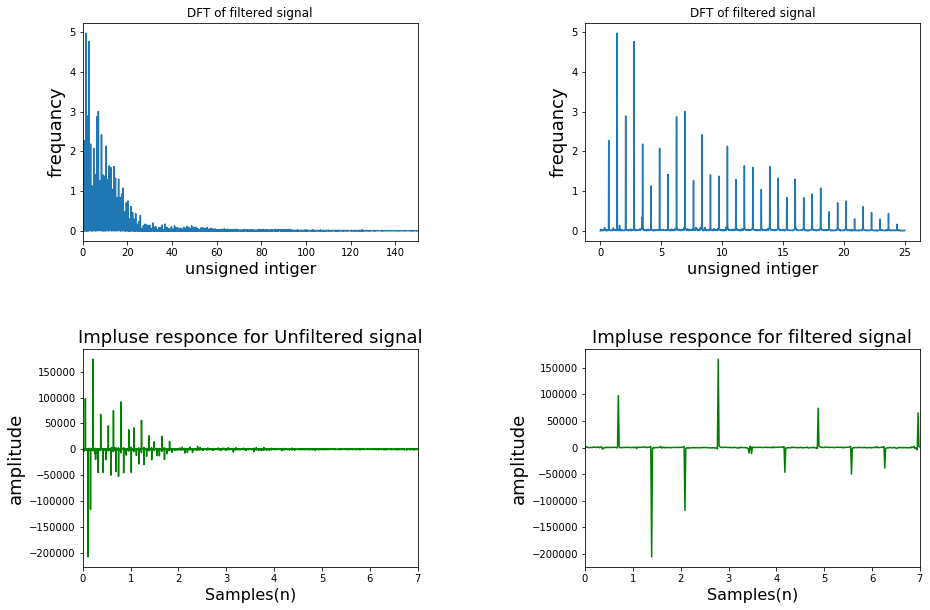

In [8]:


from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
LL=len(s)
ff=np.arange(0,750,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:43080])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('unsigned intiger',fontsize=16)
ax.set_xlim(xmax = 150, xmin =0)
indx=np.where(ff>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('unsigned intiger',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,Y,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Impluse responce for Unfiltered signal',fontsize=18)
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Samples(n)',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(ff,YY,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Impluse responce for filtered signal',fontsize=18)
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Samples(n)',fontsize=16)

Ans 17 : 

    Butterworth filters has smooth, maximum flat responce than other kind of filters and it reduces the amplitude by -3 db or depends on the cutoff frequency. It provides a near 0 attenuation until near the cutoff frequency and then descends into attenuation smoothly. The tranition becomes sharper with higher orders.[4]

    From the frequency responce for my output of the butterworth filter that the transition from 0 to 100 hz is flat and it will be better if we increase to the nth order but it is not possible in real. Here, we can see that the amplitude of the signal decreases but it does not affact the signal significuntly and even The signal looks smooth line and less atenuated. It doesnt affect the sampling frequency.
    
    The magnitude response  |H(jw)| of the butterworth filter decreases with increase in frequency from 0 to W,The width of the transition band is more in Butterworth filter and the slope is changing with frequency.[4]


# Bibilography : 


1. http://www.medicine-on-line.com/html/ecg/e0001en_files/05.htm
2. https://www.ecgmedicaltraining.com/large-block-method-to-calculate-heart-rate/
3. Generalized digital Butterworth filter design,I.W. Selesnick,Dept. of Electr. Eng. & Comput. Sci., Polytech. Univ., USA
4. Gaikwad, K. M., and M. S. Chavan. “Removal of High Frequency Noise from ECG Signal Using Digital IIR Butterworth Filter.” In    2014 IEEE Global Conference on Wireless Computing Networking (GCWCN), 121–24, 2014.
5. "Removal of power-line interference from the ECG: a review of the subtraction procedure" , Chavdar Levkov, Georgy Mihov,        Ratcho Ivanov, Ivan Daskalov, Ivaylo Christov and Ivan DotsinskyEmail author
6. http://www.biolmedonline.com/Articles/Vol6_1_2014/BM-015-14_Kazakov.pdf
7. "FILTERING OF ECG SIGNAL USING BUTTERWORTH FILTER AND ITS FEATURE EXTRACTION",BHARTI SALSEKAR, et al. / International Journal of Engineering Science and Technology (IJEST)